## "Визуализация данных"

#### Необходимо провести базовый EDA выбранного набора данных

### Анализ данных приложений из Google Play.  
**Подготовка данных**  

Для построения нескольких графиков, наверное, будет достаточно файла с описанием приложений - googleplaystore.csv.   
Второй файл - googleplaystore_user_reviews.csv - брать не буду. К его анализу имеет смысл переходить только после изучения более общего файла с приложениями.

In [465]:
# читаем файл 
import pandas as pd
import numpy as np
data_1 = pd.read_csv('googleplaystore.csv', sep=',')
data_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [466]:
# выводим информацию
data_1.info()
# Видим, что что-то мешает считать столбец с кол-вом отзывов числовым

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [467]:
# выводим все строки reviews, содержащие не-цифры
data_1[data_1.Reviews.str.contains('\D')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [468]:
# Видим, что в строке почему-то съехали значения относительно столбцов, восстанавливаем их. 
# Данные для Category и Genres выбираем из списков Category.unique() и Genres.unique() на основе описания приложения в сети и здравого смысла
# Заменяем данные в строке
data_1.loc[10472,'Genres'] = 'Photography'
data_1.loc[10472,'Content Rating'] = 'Everyone'
data_1.loc[10472,'Price'] = '0'
data_1.loc[10472,'Type'] = 'Free'
data_1.loc[10472,'Installs'] = '1,000+'
data_1.loc[10472,'Size'] = '3.0M'
data_1.loc[10472,'Reviews'] = 19.0
data_1.loc[10472,'Rating'] = 1.9
data_1.loc[10472,'Category'] = 'PHOTOGRAPHY'
print(data_1.loc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                      PHOTOGRAPHY
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                        Photography
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object


In [469]:
# удаляем столбцы, которые кажутся не очень важными для первичного анализа данных
data = data_1.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis = 1)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [470]:
# переводим значения столба с кол-вом отзывов из строк в числа, проверяем
data = data.astype({'Reviews': float})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
dtypes: float64(2), object(8)
memory usage: 847.1+ KB


In [471]:
# смотрим, почему в столбце Type пропущенное значение
data.loc[pd.isnull(data.Type),:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,Varies with device,0,NaN,0,Everyone 10+,Strategy


In [472]:
# Пусть Type = Free, т.к. в стоимости стоит 0, а в описании на сайте указаны встроенные покупки (обычно их предлагают после загрузки бесплатных игр)
data.loc[9148,'Type'] = 'Free'

In [473]:
# Переименовываем столбцы для удобства работы
data.columns = ['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type', 'price', 'content_mark', 'genres']
data.head()

,app,category,rating,reviews,size,installs,type,price,content_mark,genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [474]:
data.info()
# теперь вроде все Ок, с отсутствующими рейтингами делать ничего не будем (видимо, на момент выгрузки данных оценок пользователей для этих приложений еще не было)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
app             10841 non-null object
category        10841 non-null object
rating          9367 non-null float64
reviews         10841 non-null float64
size            10841 non-null object
installs        10841 non-null object
type            10841 non-null object
price           10841 non-null object
content_mark    10841 non-null object
genres          10841 non-null object
dtypes: float64(2), object(8)
memory usage: 847.1+ KB


In [475]:
# На  самом деле, все ужасно. При попытке понять, что же входит в категорию FAMILY, в данных обнаружились повторы. 
# Перепроверить это можно, посчитав уникальные значения по столбцу app
data['app'].nunique()

9660

In [476]:
# Строки дублируются иногда по категориям, иногда полностью (может, не дублировались по версиям, которые я уже обрезала), 
# рейтинг при этои одинаковый, а число отзывов может отличаться. 
# Удалим все дублирующиеся значения из столбца app, при этом проигноририруем, что нарушится классификация по категориям
# Просто в анализе не будем использовать вывод данных по категориям. Есть подозрение, что это деление вообще условно
# И будем оставлять строки с наибольшим кол-вом отзывов - как последние версии данных
d_f = data.sort_values('reviews', ascending = False).drop_duplicates(subset = 'app', keep='first')

# И можно сделать еще сделать дубль колонки Installs с числовыми значениями, но при этом помнить, что там не точные числа, а относительные - более 1000 скачиваний, более 10 тысяч скачиваний
d_f['installs'] = d_f['installs'].str.replace(",", "")
d_f['installs_num'] = d_f['installs'].str.replace("+", "").astype(int)
d_f

,app,category,rating,reviews,size,installs,type,price,content_mark,genres,installs_num
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,1000000000+,Free,0,Teen,Social,1000000000
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000+,Free,0,Everyone,Communication,1000000000
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,1000000000+,Free,0,Teen,Social,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1000000000+,Free,0,Everyone,Communication,1000000000
1879,Clash of Clans,GAME,4.6,44893888.0,98M,100000000+,Free,0,Everyone 10+,Strategy,100000000
...,...,...,...,...,...,...,...,...,...,...,...
9713,eP Finder,AUTO_AND_VEHICLES,NaN,0.0,6.3M,10+,Free,0,Everyone,Auto & Vehicles,10
8495,HDWallpaper DK,PERSONALIZATION,NaN,0.0,6.6M,10+,Free,0,Teen,Personalization,10
6277,Bi-Tank Ads Free,GAME,NaN,0.0,Varies with device,1+,Paid,$0.99,Everyone,Arcade,1
8489,DK Primrose for KLWP,PERSONALIZATION,NaN,0.0,16M,1+,Paid,$0.99,Everyone,Personalization,1


Надеюсь, такой подготовки данных будет достаточно. Можно строить графики.  

## Графики

In [477]:
import matplotlib.pyplot as plt
import seaborn as sns
#увеличим дефолтный размер графиков и подписей к ним
from pylab import rcParams
rcParams['figure.figsize'] = 16,7
rcParams['font.size'] = 16

Надо понять, с чего начать и вокруг какой идеи выстраивать анализ.   
У нас мало числовых переменных - 2 нормальных с рейтингами и кол-вом отзывов и 1 условная с кол-вом закачиваний + можно в числовые перевести стоимость приложений.   
С категориальными переменными тоже сложно:  
В Category были пересечения, которые пришлось удалить и, есть подозрение, что распределение приложений внутри этой категори в принципе условно: в "Family" входят и игры, и обучающие программы, и медиаплееры. 
В Genres программы, может, и не дублируются, но этих самых жанров у нас 118 уникальных значений с частично совпадающими основаниями для классификации (вроде education, entertainment, games и т.д.)  
Поэтому возьмем, для начала, что-то совсем простое: например, соотношение платных и бесплатных приложений. 
Я помню про вред круговых диаграмм, но в данном конкретном случае она вряд ли вводит в заблуждение.

Text(0.5, 1.0, 'Доля платных и бесплатных приложений в GooglePlayStore')

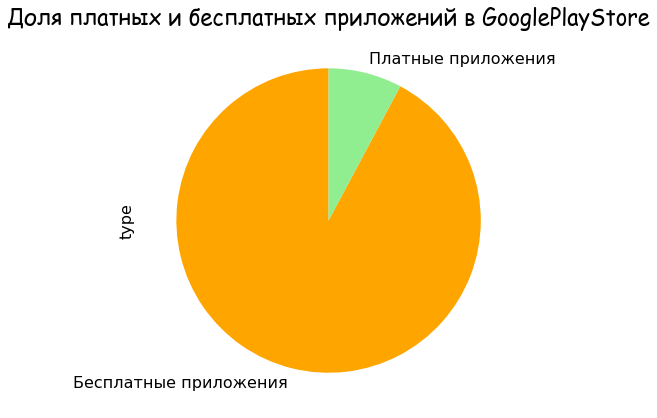

In [478]:
pie_data = d_f.type.value_counts()
ax = pie_data.plot(kind='pie',
                  colors = ['orange', 'lightgreen'], 
                   startangle=90,
                  labels = ['Бесплатные приложения', 'Платные приложения'])

plt.title('Доля платных и бесплатных приложений в GooglePlayStore', fontsize=22, fontname='Comic Sans MS', color='black')
# я не разобралась, как убрать слева type в данном конкретном случае :(

**В Google Play Store преобладают бесплатные приложения**. Возможные причины:  
1. Пользователи не любят платить деньги, если можно найти бесплатный аналог
2. Google и производители приложений используют другие, более эфективные модели зарабатывания денег: реклама и встроенные покупки внутри бесплатных приложений
3. Платные и бесплатные приложения относятся к разным категориям, у них разные пользователи, с разным отношением к оплате потребляемого контента  

In [491]:
# Посмотрим, как люди скачивают платные и бесплатные приложения. 
# Сколько платных закачали более 1000 раз, сколько бесплатных - более 1 млн раз и т.д. 

# Создаем датафреймы, с распределением кол-ва приложений по категориям с объемами скачивания
# сначала отдельно для платных и бесплатных приложений, а потом объединяем их

paid_1 = paid[['installs', 'rating']].groupby('installs').count().reset_index()
paid_1.columns = ['installs', 'paid_app_quantity']
paid_1

,installs,paid_app_quantity
0,0+,0
1,1+,2
2,10+,18
3,100+,65
4,1000+,130
5,10000+,117
6,100000+,82
7,1000000+,20
8,10000000+,2
9,5+,0


In [492]:
free_1 = free[['installs', 'rating']].groupby('installs').count().reset_index()
free_1.columns = ['installs', 'free_app_quantity']
free_1

,installs,free_app_quantity
0,0,0
1,0+,0
2,1+,1
3,10+,51
4,100+,237
5,1000+,567
6,10000+,869
7,100000+,1013
8,1000000+,1395
9,10000000+,935


In [504]:
inst_distr = free_1.merge(paid_1, on= ['installs'], how='outer')
inst_distr = inst_distr.drop(inst_distr.index[[0,1]]) # удаляем строки с нулевым количеством приложений
inst_distr.fillna(0, inplace = True) # заменяем NaN

# немножко извращений с добавлением и удалением столбца с длиной строки необходимо, 
# чтобы отсортировать категории с объемами скачивания в нужном порядке
inst_distr['length']=inst_distr['installs'].str.len()
inst_distr = inst_distr.sort_values('length').reset_index()
d = {16: 17, 17: 16} # меняем местами строки, которые не отсортировалисб
inst_distr_final = inst_distr.rename(d).sort_index()
inst_distr_final.drop(['index','length'], axis=1, inplace = True)
inst_distr_final = inst_distr_final.set_index('installs') # перевод первой строки в индексы нужен, чтобы она отображалась в подписях данных
inst_distr_final


,free_app_quantity,paid_app_quantity
installs,,
1+,1,2.0
5+,9,0.0
10+,51,18.0
50+,42,14.0
100+,237,65.0
500+,163,36.0
1000+,567,130.0
5000+,360,65.0
10000+,869,117.0


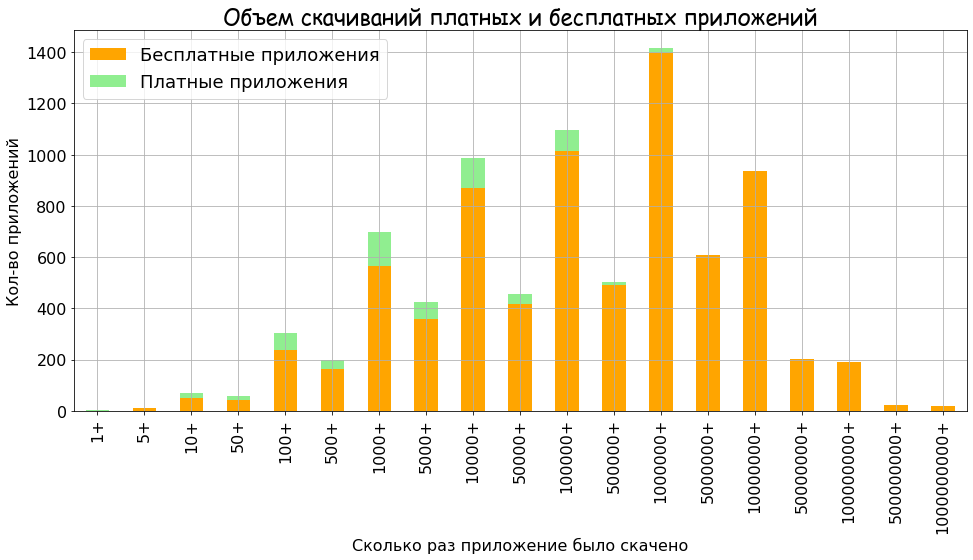

In [503]:
ax = inst_distr_final.plot(kind = 'bar', color = ['orange', 'lightgreen'], stacked = True)
plt.xlabel('Сколько раз приложение было скачено')
plt.ylabel('Кол-во приложений')
plt.title('Объем скачиваний платных и бесплатных приложений', fontsize=22, fontname='Comic Sans MS', color='black')
plt.grid(True)
plt.legend(['Бесплатные приложения', 'Платные приложения'], loc = 2, fontsize=18) # loc - расположение легенды на графике

**Бесплатных приложений не только больше, люди еще и скачивают их гораздо более активно. Практически нет платных приложений, которые были бы загружены более 1 млн раз, в то время как среди бесплатных есть и такие, которые были загружены больше 1 млрд раз.** Возможные причины примерно те же самые: 
1. В большинстве своем люди не хотят платить за то, что можно найти бесплатно
2. Платные и бесплатные приложения относятся к разным категориям, у них разные пользователи, с разным отношением к оплате потребляемого контента.
3. Платные приложения стоят дорого, не все могут себе их позволить

Text(0.5, 1.0, 'Сравнение рейтингов платных и бесплатных приложений')

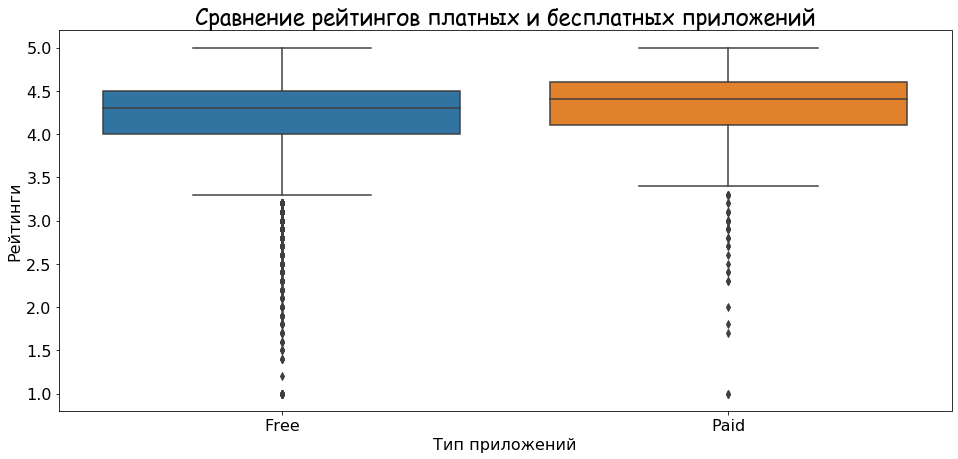

In [390]:
sns.boxplot(x=d_f['type'], y = d_f['rating'])
plt.xlabel('Тип приложений')
plt.ylabel('Рейтинги')
plt.title('Сравнение рейтингов платных и бесплатных приложений', fontsize=22, fontname='Comic Sans MS', color='black')
# boxplot = d_f.boxplot(column=['rating'], by = ['type']) еще 1 способ, но сложно редактировать

**Средние рейтинги платных и бесплатных приложений очень близки и достаточно высоки - более 4 (из 5). Хотя у обоих типов приложений есть выбросы с низкими рейтингами, у бесплатных плохих оценок больше.** Возможные причины:  
1. Наверное, ожидания пользователей в плане функционала и полезности скачиваемых приложений соответствуют реальности, поэтому рейтинги достаточно высокие. 
2. У бесплатных приложений больше выбросов с низкими оценками, потому что бесплатных приложений в Google App Storeв  гораздо больше, чем платных.

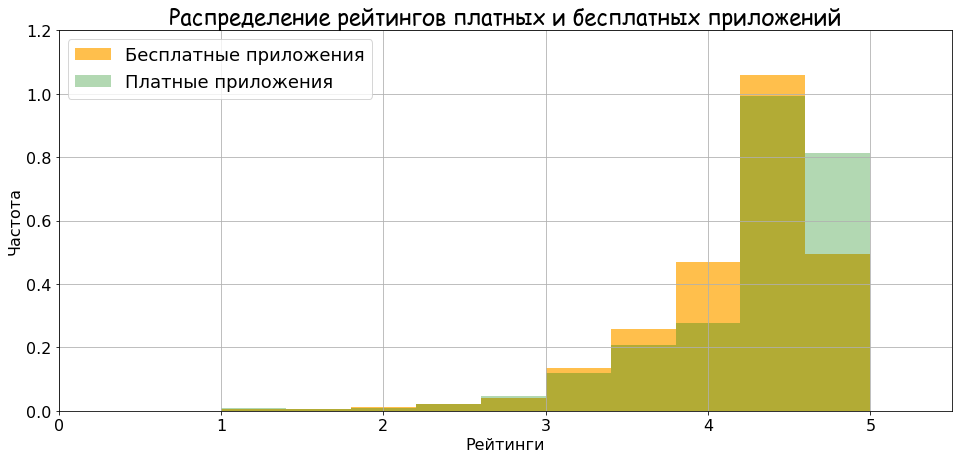

In [484]:
# распределение рейтингов у платных и бесплатных приложений
free = d_f[d_f['type'] == 'Free'] # датафрейм с данными по бесплатным приложениям
paid = d_f[d_f['type'] == 'Paid'] # датафрейм с данными по платным приложениями
free['rating'].plot(kind='hist', 
                   #title='Распределение оценок бесплатных приложений',
                   alpha = 0.7,
                    color = 'orange',
                   density = True)

paid['rating'].plot(kind='hist', 
                   #title='Распределение оценок платных приложений',
                   alpha = 0.3,
                    color = 'green',
                   density = True)

plt.xlabel('Рейтинги')
plt.ylabel('Частота')
plt.title('Распределение рейтингов платных и бесплатных приложений', fontsize=22, fontname='Comic Sans MS', color='black')
plt.grid(True)
plt.axis([0,5.5,0,1.2]) #  диапазон для осей x и y, задается в списке [xmin, xmax, ymin, ymax]
plt.legend(['Бесплатные приложения', 'Платные приложения'], loc = 2, fontsize=18) # loc - расположение легенды на графике

**Если посмотреть на распределение количества оценок по шкале с рейтингами, получится, что платным приложениям чаззе ставят более высокие оценки.** Возможные причины:  
1. Платные приложения сделаны более качественно.
2. Это когнитивный диссонанс после принятия решения: "Приложение классное, потому что такой умный и замечательный Я просто не мог потратить деньги на какую-то ерунду".

In [ ]:
top5_genres = df[['Global_Sales', 'Genre']].groupby('Genre').sum().sort_values('Global_Sales', ascending=False).head(5)
top5_genres.plot(kind='bar', title='Топ 5 жанров по продажам',
                             xlabel='Объем загрузок приложений',
                             ylabel='Количество игр')
for i, val in enumerate(top5_genres.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

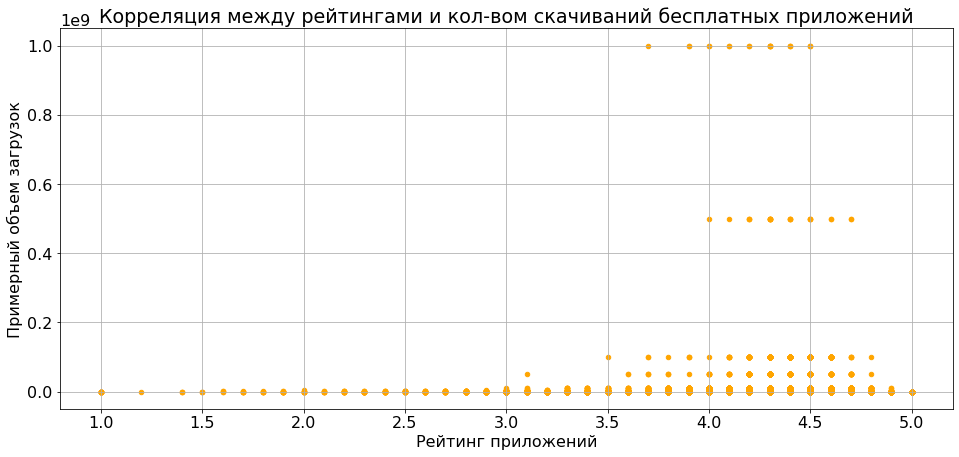

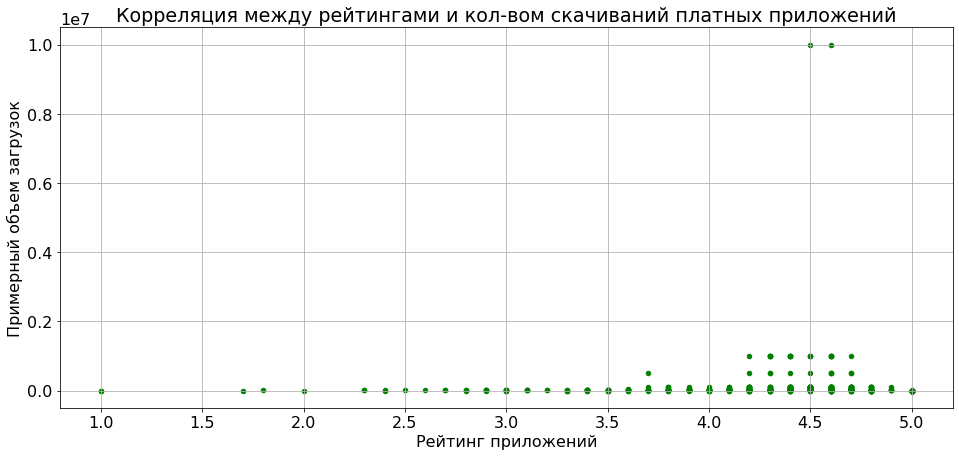

In [510]:
# В данном случае кол-во скачиваний - условный параметр, идет по нижней границе (1000+). Других данных нет :(
# бесплатные приложения 
free.plot(kind='scatter', 
        x='rating', 
        y='installs_num', 
          color = 'orange',
        title='Корреляция между рейтингами и кол-вом скачиваний бесплатных приложений')
plt.xlabel('Рейтинг приложений')
plt.ylabel('Примерный объем загрузок')
plt.grid(True)
# платные приложения
paid.plot(kind='scatter', 
        x='rating', 
        y='installs_num', 
          color = 'green',
        title='Корреляция между рейтингами и кол-вом скачиваний платных приложений')
plt.xlabel('Рейтинг приложений')
plt.ylabel('Примерный объем загрузок')
plt.grid(True)

Разброс точек на графиках по вертикали ограничен из-за специфики данных (это переведенные в числа категории). 
На графиках ниже распределение выглядит более реальным - рассеяным по вертикали (но пересекать ретинги и отзывы, наверное, не совсем правильно, и так понятно, что они связаны, часто поставлены/написаны одними и теми же людьми в одно и то же время).   
**Связь между рейтингами и объемом скачивания приложений есть. Но непонятно, или пользователи стараются скачивать приложения с более высокими рейтингами, или высоко оценивают то, что скачивают**.

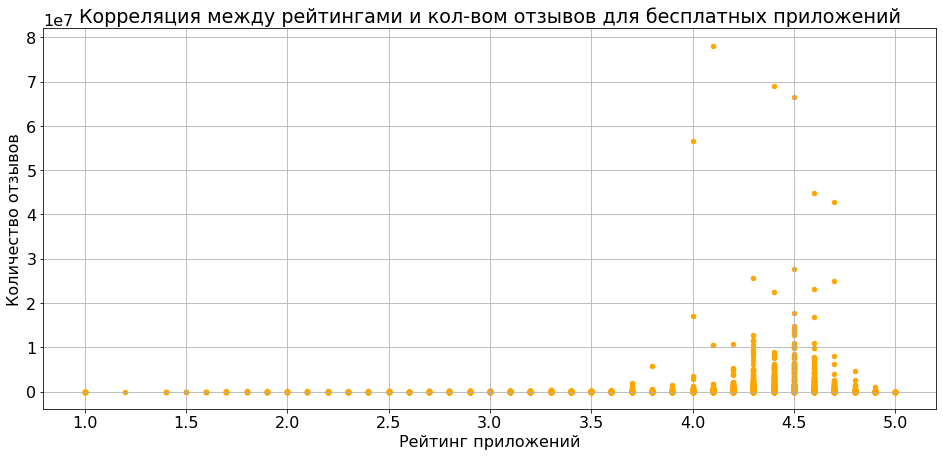

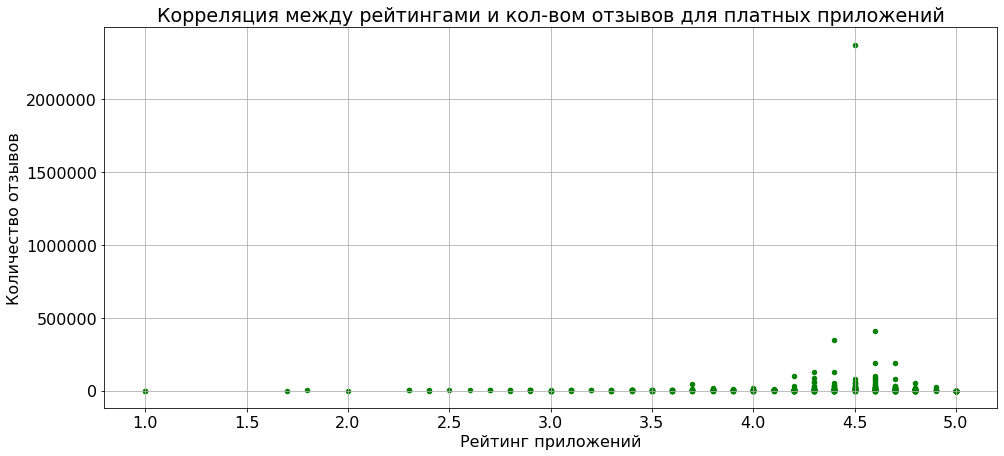

In [514]:
# бесплатные приложения 
free.plot(kind='scatter', 
        x='rating', 
        y='reviews', 
        color = 'orange',
        title='Корреляция между рейтингами и кол-вом отзывов для бесплатных приложений')
plt.xlabel('Рейтинг приложений')
plt.ylabel('Количество отзывов')
plt.grid(True)

# платные приложения
paid.plot(kind='scatter', 
        x='rating', 
        y='reviews', 
        color = 'green',
        title='Корреляция между рейтингами и кол-вом отзывов для платных приложений')
plt.xlabel('Рейтинг приложений')
plt.ylabel('Количество отзывов')
plt.grid(True)

И можно попробовать как-то оценить, какие именно жанры приложений популярны у аудитории. Возьмем топ-15 жанров по количеству загрузок. Я помню, что последний параметр - условный. Но о популярности приложений/жанров можно судить только по объемам потребления, а в данном наборе данных другого способа как-то прикинуть этот объем я не нашла :(.   
**Попробуем построить тепловые карты**


In [431]:
# сгруппируем платные приложения по жанрам
paid_apps_groupedby_genres = paid_new[['genres', 'rating']].groupby('genres').count().reset_index().sort_values('rating', ascending=False)
ppp.head(10)

,genres,rating
49,Personalization,65
68,Tools,63
44,Medical,62
0,Action,24
24,Communication,22
64,Sports,22
56,Role Playing,22
51,Productivity,18
42,Lifestyle,18
26,Education,18


In [444]:
# найдем топ-15 жанров по количеству загрузок. 
top_paid_genres_inst = paid_new[['genres', 'installs_num']].groupby('genres').sum().reset_index().sort_values('installs_num', ascending=False).head(15)
top_paid_genres_inst

,genres,installs_num
0,Action,17052250
6,Arcade;Action & Adventure,10110000
49,Personalization,3258794
52,Puzzle,2190620
56,Role Playing,2092100
66,Strategy,1995500
50,Photography,1878740
68,Tools,1727441
5,Arcade,1437215
51,Productivity,1412055


In [515]:
top_paid_genres_inst['genres'].unique()

array(['Action', 'Arcade;Action & Adventure', 'Personalization', 'Puzzle',
       'Role Playing', 'Strategy', 'Photography', 'Tools', 'Arcade',
       'Productivity', 'Communication', 'Adventure', 'Sports',
       'Lifestyle', 'Puzzle;Brain Games'], dtype=object)

In [528]:
paid_top_15 = paid.copy()
new = paid_top_15['genres'].isin(['Action', 'Arcade;Action & Adventure', 'Personalization', 'Puzzle',
       'Role Playing', 'Strategy', 'Photography', 'Tools', 'Arcade',
       'Productivity', 'Communication', 'Adventure', 'Sports',
       'Lifestyle', 'Puzzle;Brain Games'])
paid_top_15 = paid_top_15[new]
paid_top_15

,app,category,rating,reviews,size,installs,type,price,content_mark,genres,installs_num
2241,Minecraft,FAMILY,4.5,2376564.0,Varies with device,10000000+,Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,10000000
4034,Hitman Sniper,GAME,4.6,408292.0,29M,10000000+,Paid,$0.99,Mature 17+,Action,10000000
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26M,1000000+,Paid,$6.99,Mature 17+,Action,1000000
8860,Bloons TD 5,FAMILY,4.6,190086.0,94M,1000000+,Paid,$2.99,Everyone,Strategy,1000000
9678,Where's My Water?,FAMILY,4.7,188740.0,69M,1000000+,Paid,$1.99,Everyone,Puzzle;Brain Games,1000000
...,...,...,...,...,...,...,...,...,...,...,...
5265,AJ Turquoise Dark Icon Pack,PERSONALIZATION,NaN,0.0,32M,10+,Paid,$0.99,Everyone,Personalization,10
6292,BI Barcode Scanner,PRODUCTIVITY,NaN,0.0,473k,10+,Paid,$0.99,Everyone,Productivity,10
5269,AJ Orange Icon Pack,PERSONALIZATION,NaN,0.0,30M,10+,Paid,$0.99,Everyone,Personalization,10
6277,Bi-Tank Ads Free,GAME,NaN,0.0,Varies with device,1+,Paid,$0.99,Everyone,Arcade,1


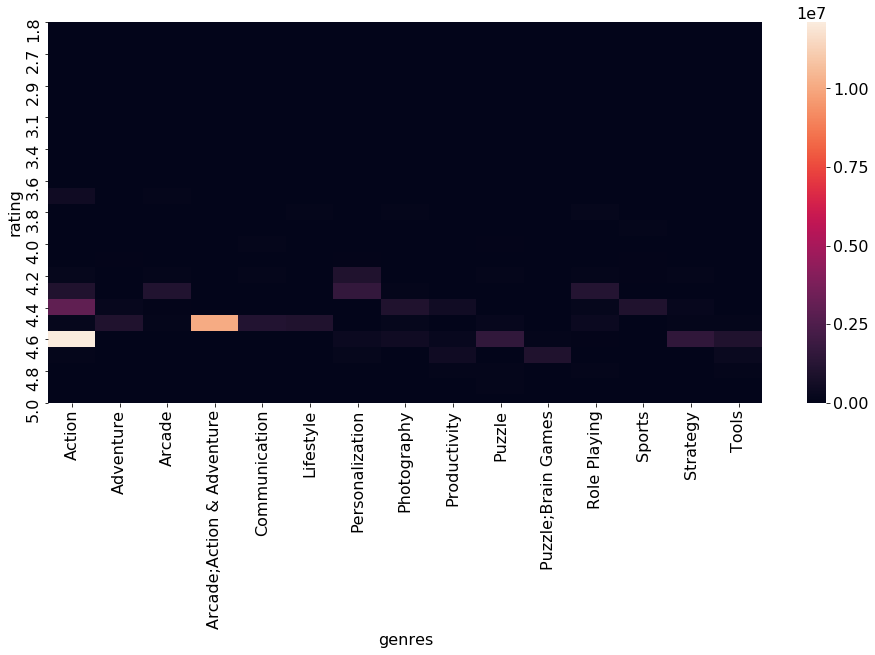

In [524]:
# Скачивание игр в зависимости от жанра и количества загрузок
top_15_genres_inst = paid_top_15.pivot_table(
                        index='rating', 
                        columns='genres', 
                        values='installs_num',
                        aggfunc= sum).fillna(0)
sns.heatmap(top_15_genres_inst)

Среди платных приложений наибольшей популярностью пользуются игры: экшн, аркады и приключения. Все остальное, хоть и имеет высокий рейтинг, но объем загрузок не сопоставим :(

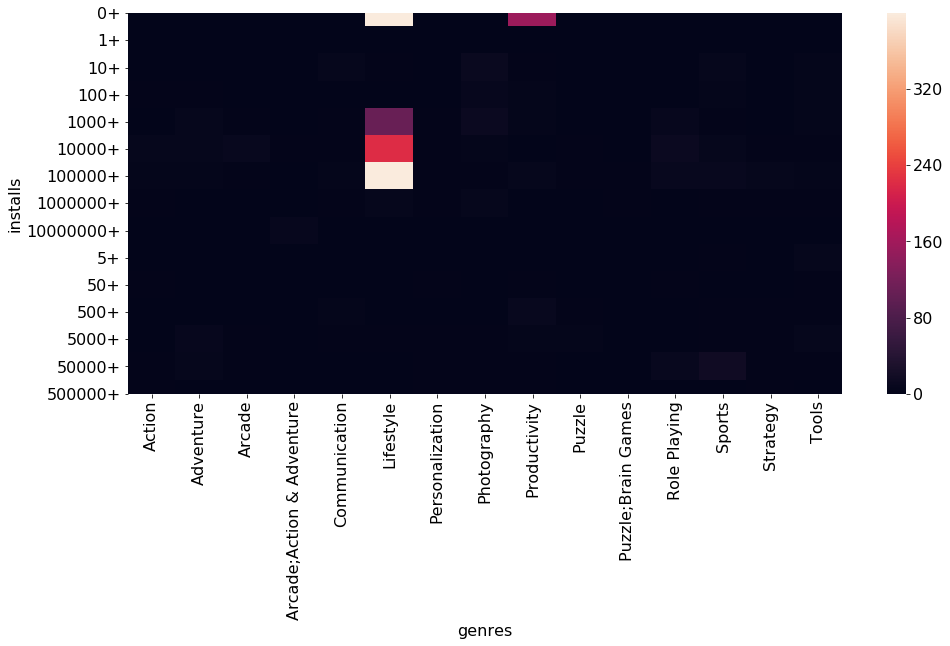

In [530]:
# Cредняя стоимость приложений по жанрам и объему загрузок
paid_top_15['price_num'] = d_f['price'].str.replace("$", "").astype(float)
top_15_genres_price = paid_top_15.pivot_table(
                        index='installs', 
                        columns='genres', 
                        values='price_num', 
                        aggfunc= np.mean).fillna(0)
sns.heatmap(top_15_genres_price)

Как ни странно, но самые дорогие приложения - это не игры, а нечто в категории Lifestyle. И это нечто, судя по количеству загрузок, по какой-то причине пользуется популярностью у аудитории.

Text(0.5, 1.0, 'Разброс стоимости платных приложений')

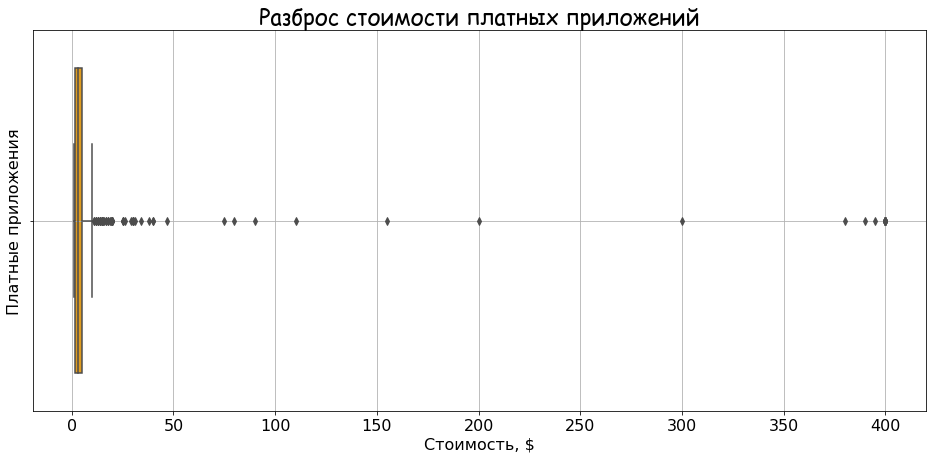

In [532]:
paid_new = paid.copy()
paid_new['price_num'] = paid_new['price'].str.replace("$", "").astype(float)
sns.boxplot(x=paid_new['price_num'], color = 'orange')
plt.xlabel('Стоимость, $')
plt.ylabel('Платные приложения')
plt.grid(True)
plt.title('Разброс стоимости платных приложений', fontsize=22, fontname='Comic Sans MS', color='black')

Со стоимостью платных приложений творится что-то очень странное. Стоимость 50 % приложений нахдится в пределах от 0 до 8 - 10 долларов. И есть огромное количество выбросов с высокой стоимостью - до 400 долларов. Видимо, это та самая категория Lifestyle. Если вывести данные по этой категории, то сразу бросается в глаза приложение I am rich стоимостью 400$. (и его вариации за чуть меньшие деньги). Но это уже совсем другая история...

In [464]:
d_f.loc[(d_f.genres == 'Lifestyle') & (d_f.type == 'Paid')].head(30)

,app,category,rating,reviews,size,installs,type,price,content_mark,genres,installs_num
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,872k,1000000+,Paid,$5.99,Everyone,Lifestyle,1000000
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,Varies with device,10000+,Paid,$2.49,Everyone,Lifestyle,10000
7165,My Movies Pro - Movie & TV Collection Library,LIFESTYLE,4.6,6477.0,20M,10000+,Paid,$7.99,Everyone,Lifestyle,10000
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,100000+,Paid,$399.99,Everyone,Lifestyle,100000
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,10000+,Paid,$399.99,Everyone,Lifestyle,10000
5847,Lunar Calendar,LIFESTYLE,4.5,484.0,Varies with device,1000+,Paid,$4.99,Mature 17+,Lifestyle,1000
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.6M,10000+,Paid,$299.99,Everyone,Lifestyle,10000
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,10000+,Paid,$400.00,Everyone,Lifestyle,10000
6140,Board Game Stats: Play tracking for tabletop g...,LIFESTYLE,4.6,275.0,3.9M,5000+,Paid,$2.99,Everyone,Lifestyle,5000
4175,A41 WatchFace for Android Wear Smart Watch,LIFESTYLE,4.5,231.0,5.7M,5000+,Paid,$0.99,Everyone,Lifestyle,5000
